Start of Test - Begin Loop!
Testing part II -
[0]
Testing part II -
[1]
Testing part II -
[2]
Testing part II -
[3]
Testing part II -
[4]
Testing part II -
[5]
Testing part II -
[6]
Testing part II -
[7]
Testing part II -
[8]
Testing part II -
[9]
Testing part II -
[10]
Testing part II -
[11]
Testing part II -
[12]
Testing part II -
[13]
Testing part II -
[14]
Testing part II -
[15]
Testing part II -
[16]
Testing part II -
[17]
Testing part II -
[18]
Testing part II -
[19]
Testing part II -
[20]
Testing part II -
[21]
Testing part II -
[22]
Testing part II -
[23]
Testing part II -
[24]
Testing part II -
[25]
Testing part II -
[26]
Testing part II -
[27]
Testing part II -
[28]
Testing part II -
[29]
ttest:  t=0.599459  p=0.551634
man whitney:  t=539  p=0.188176
ttest:  t=0.233237  p=0.816468
man whitney:  t=424.5  p=0.710464


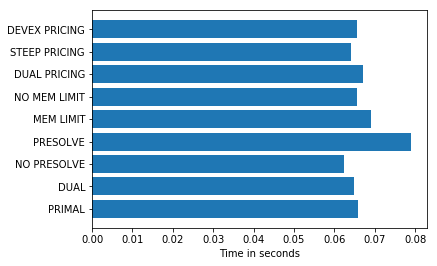

In [17]:
from pulp import *
import time
import numpy as np
import pandas as pd
from scipy import stats
from random import randint
from __future__ import print_function


CPLEXtime1 = {}
CPLEXtime2 = {}
CPLEXtime3 = {}
CPLEXtime4 = {}
CPLEXtime5 = {}
CPLEXtime6 = {}
CPLEXtime7 = {}
CPLEXtime8 = {}
CPLEXtime9 = {}

print ("Start of Test - Begin Loop!")
#create 30 insances to test
iter = 0
while iter < 30:
    prob = pulp.LpProblem("Transportation Problem", pulp.LpMinimize)

    #Supply locations, X, from 1 to N
    N = 50
    Supply = {}
    for s in range (0,N):
        Supply[s] = randint(1,100)

    #demand locations, Y from 1 to M
    M = 50
    Demand = {}
    for d in range (0,M-1):
        Demand[d] = randint(1,100)

    #Supply_total = sum(Supply.values())
    #Demand_total = sum(Demand.values())

    FIX = sum(Supply.values())-sum(Demand.values())

    if FIX > 0:
        Demand[M-1] = FIX
    elif FIX < 0:
        Supply[N-1] = Supply[N-1]-FIX
    else:
        Demand[M-1] = 0



    #create matrix with arc weights
    ARC = np.random.uniform(1,9,size=(N,M))


    #create ARC connections between supply and demand nodes
    Routes = {}
    Routes = [(n,m) for n in range(0,N) for m in range(0,M)]


    Route_vars = LpVariable.dicts("X",(Routes),0,None,LpInteger)

    for s in Supply:
        prob += lpSum([Route_vars[s,m] for m in Demand]) <= Supply[s]

    for d in Demand:
        prob += lpSum([Route_vars[n,d] for n in Supply]) >= Demand[d]

    print ("Testing part II -" )
    print([iter])

    #This command forces the solver to start using the Primal 
    start_time = time.time()
    prob.solve(CPLEX(options=["preprocessing.dual=1"]))
    
    CPLEXtime1[iter] = (time.time() - start_time)
    
    
    
    #This command forces the solver to start using the Dual 
    start_time = time.time()
    prob.solve(CPLEX(options=["preprocessing.dual=-1"]))
    
    CPLEXtime2[iter] = (time.time() - start_time)
    
    #This command does not let the solver use the presolve function
    start_time = time.time()
    prob.solve(CPLEX(options=["preprocessing.numpass=0"]))
    
    CPLEXtime3[iter] = (time.time() - start_time)
    
    #This command does let the solver use the presolve function
    start_time = time.time()
    prob.solve(CPLEX(options=["preprocessing.numpass=1"]))
    
    CPLEXtime4[iter] = (time.time() - start_time)
    
    #This command tells CPLEX to conserve memory when possible while solving
    start_time = time.time()
    prob.solve(CPLEX(options=["emphasis.memory=1"]))
    
    CPLEXtime5[iter] = (time.time() - start_time)
    
    #This command tells CPLEX to not conserve memory when possible while solving
    start_time = time.time()
    prob.solve(CPLEX(options=["emphasis.memory=0"]))
    
    CPLEXtime6[iter] = (time.time() - start_time)
    
        #This command tells CPLEX to use standard dual pricing while solving
    start_time = time.time()
    prob.solve(CPLEX(options=["simplex.dgradient=1"]))
    
    CPLEXtime7[iter] = (time.time() - start_time)
    
        #This command tells CPLEX to steepest edge dual pricing while solving
    start_time = time.time()
    prob.solve(CPLEX(options=["simplex.dgradient=2"]))
    
    CPLEXtime8[iter] = (time.time() - start_time)
    
        #This command tells CPLEX to use devex pricing while solving
    start_time = time.time()
    prob.solve(CPLEX(options=["simplex.dgradient=5"]))
    
    CPLEXtime9[iter] = (time.time() - start_time)
    
    iter = iter + 1
    #print[iter]
    
#two tailed t-test for mem limit
t_stat, p_val = stats.ttest_ind(CPLEXtime5.values(), CPLEXtime6.values(), equal_var=False)
print ("ttest:  t=%g  p=%g" %(t_stat,p_val))

x = np.array(CPLEXtime5.values())
y = np.array(CPLEXtime6.values())

m_stat, p_manval = stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')
print ("man whitney:  t=%g  p=%g" %(m_stat,p_manval))

#two tailed t-test for primal/dual
t_stat, p_val = stats.ttest_ind(CPLEXtime1.values(), CPLEXtime2.values(), equal_var=False)
print ("ttest:  t=%g  p=%g" %(t_stat,p_val))

x = np.array(CPLEXtime1.values())
y = np.array(CPLEXtime2.values())

m_stat, p_manval = stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')
print ("man whitney:  t=%g  p=%g" %(m_stat,p_manval))


#graph average result of 30 successful trials
C1_Graph = (sum(CPLEXtime1.values())/30)  
C2_Graph = (sum(CPLEXtime2.values())/30) 
C3_Graph = (sum(CPLEXtime3.values())/30) 
C4_Graph = (sum(CPLEXtime4.values())/30)
C5_Graph = (sum(CPLEXtime5.values())/30)
C6_Graph = (sum(CPLEXtime6.values())/30)
C7_Graph = (sum(CPLEXtime7.values())/30)
C8_Graph = (sum(CPLEXtime8.values())/30)
C9_Graph = (sum(CPLEXtime9.values())/30)
Times = (C1_Graph, C2_Graph, C3_Graph, C4_Graph, C5_Graph, C6_Graph, C7_Graph, C8_Graph, C9_Graph)
Index = np.arange(9)

matp.barh(Index, Times)
matp.yticks(Index, ("PRIMAL", "DUAL", "NO PRESOLVE", "PRESOLVE", "MEM LIMIT", "NO MEM LIMIT", "DUAL PRICING", "STEEP PRICING", "DEVEX PRICING"))
matp.xlabel('Time in seconds')
matp.show()